___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Copyright by Pierian Data Inc.</em></center>
<center><em>For more information, visit us at <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# K Means Color Quantization

### Imports


In [1]:
import numpy as np

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

### The Image

In [2]:
image_as_array = mpimg.imread('dipendrathapa.jpg')

In [3]:
image_as_array # RGB CODES FOR EACH PIXEL

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[ 18,  42, 106],
        [ 16,  39, 106],
        [ 16,  41, 107],
        ...,
        [ 43,  79, 155],
        [ 43,  79, 155],
        [ 43,  79, 155]],

       [[ 19,  43, 107],
        [ 15,  38, 105],
        [ 14,  39, 105],
        ...,
        [ 43,  79, 155],
        [ 43,  79, 155],
        [ 43,  79, 155]],

       [[ 20,  44, 108],
        [ 16,  39, 106],
        [ 14,  39, 105],
        ...,
        [ 40,  76, 152],
        [ 40,  76, 152],
        [ 40,  76, 152]]

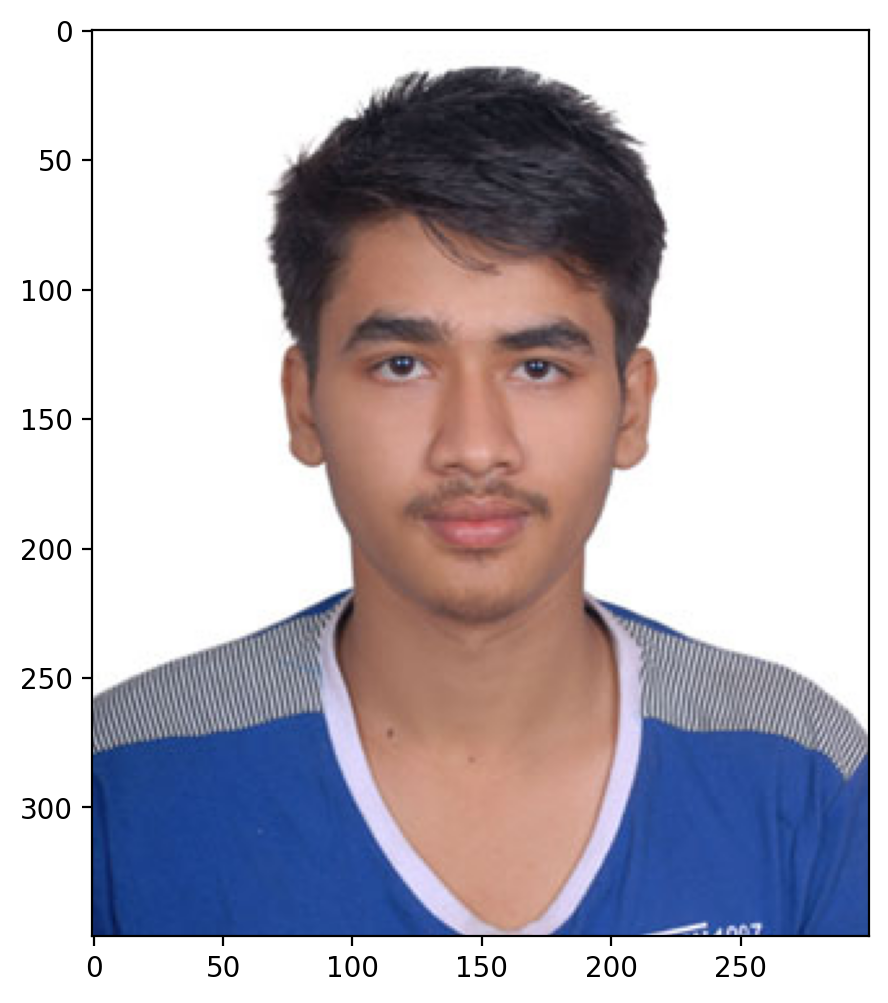

In [8]:
plt.figure(figsize=(6,6),dpi=200)
plt.imshow(image_as_array)

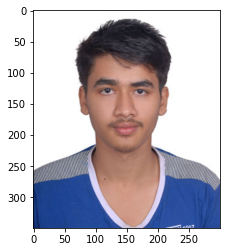

## Using Kmeans to Quantize Colors

Quantizing colors means we'll reduce the number of unique colors here to K unique colors. Let's try just 6 colors!

In [6]:
image_as_array.shape
# (h,w,3 color channels)

(350, 300, 3)

### Convert from 3d to 2d

Kmeans is designed to train on 2D data (data rows and feature columns), so we can reshape the above strip by using (h,w,c) ---> (h * w,c)

In [7]:
(h,w,c) = image_as_array.shape

In [8]:
image_as_array2d = image_as_array.reshape(h*w,c)

In [9]:
from sklearn.cluster import KMeans

In [50]:
model = KMeans(n_clusters=60)

In [51]:
model

KMeans(n_clusters=60)

In [52]:
labels = model.fit_predict(image_as_array2d)

In [53]:
labels

array([ 1,  1,  1, ..., 24, 24, 24], dtype=int32)

In [54]:
# THESE ARE THE 6 RGB COLOR CODES!
model.cluster_centers_

array([[163.76918799, 116.47942158,  99.92324805],
       [254.90054845, 254.90790676, 254.89435558],
       [ 28.57132818,  65.62122277, 140.69255095],
       [ 56.13523132,  51.39928826,  59.16370107],
       [190.25961538, 164.8125    , 166.79326923],
       [205.52564729, 151.35271128, 132.9086468 ],
       [125.06790123, 126.11111111, 138.37345679],
       [116.67075306,  82.44833625,  75.16987741],
       [213.94097808, 207.68634064, 238.94097808],
       [ 24.85231539,  23.03003755,  30.09011264],
       [ 49.24125874,  80.75874126, 154.11975524],
       [148.68024133, 149.61085973, 162.20512821],
       [184.44324906, 133.08068854, 114.10812265],
       [127.81927711,  93.88704819,  87.04216867],
       [ 47.69993683,  42.42577385,  49.53063803],
       [151.87179487, 102.79487179,  87.85067873],
       [101.93859649, 102.99122807, 115.12406015],
       [169.58221477, 170.56711409, 183.68791946],
       [ 87.01818182,  63.24090909,  60.3       ],
       [176.25609756, 112.86890

In [55]:
rgb_codes = model.cluster_centers_.round(0).astype(int)

In [56]:
rgb_codes

array([[164, 116, 100],
       [255, 255, 255],
       [ 29,  66, 141],
       [ 56,  51,  59],
       [190, 165, 167],
       [206, 151, 133],
       [125, 126, 138],
       [117,  82,  75],
       [214, 208, 239],
       [ 25,  23,  30],
       [ 49,  81, 154],
       [149, 150, 162],
       [184, 133, 114],
       [128,  94,  87],
       [ 48,  42,  50],
       [152, 103,  88],
       [102, 103, 115],
       [170, 171, 184],
       [ 87,  63,  60],
       [176, 113,  99],
       [208, 199, 217],
       [ 43,  74, 144],
       [ 17,  44, 106],
       [209, 157, 139],
       [ 39,  75, 154],
       [194, 189, 201],
       [198, 145, 127],
       [219, 169, 155],
       [160, 110,  93],
       [242, 241, 242],
       [213, 162, 146],
       [ 89,  90, 102],
       [ 67,  61,  69],
       [ 95, 111, 158],
       [ 32,  29,  37],
       [ 25,  59, 127],
       [113, 114, 126],
       [ 72,  52,  51],
       [142,  96,  84],
       [222, 215, 249],
       [133,  86,  75],
       [ 79,  73

In [57]:
quantized_image = np.reshape(rgb_codes[labels], (h, w, c))

In [58]:
quantized_image

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[ 17,  44, 106],
        [ 17,  44, 106],
        [ 17,  44, 106],
        ...,
        [ 44,  80, 161],
        [ 44,  80, 161],
        [ 44,  80, 161]],

       [[ 17,  44, 106],
        [ 17,  44, 106],
        [ 17,  44, 106],
        ...,
        [ 44,  80, 161],
        [ 44,  80, 161],
        [ 44,  80, 161]],

       [[ 17,  44, 106],
        [ 17,  44, 106],
        [ 17,  44, 106],
        ...,
        [ 39,  75, 154],
        [ 39,  75, 154],
        [ 39,  75, 154]]

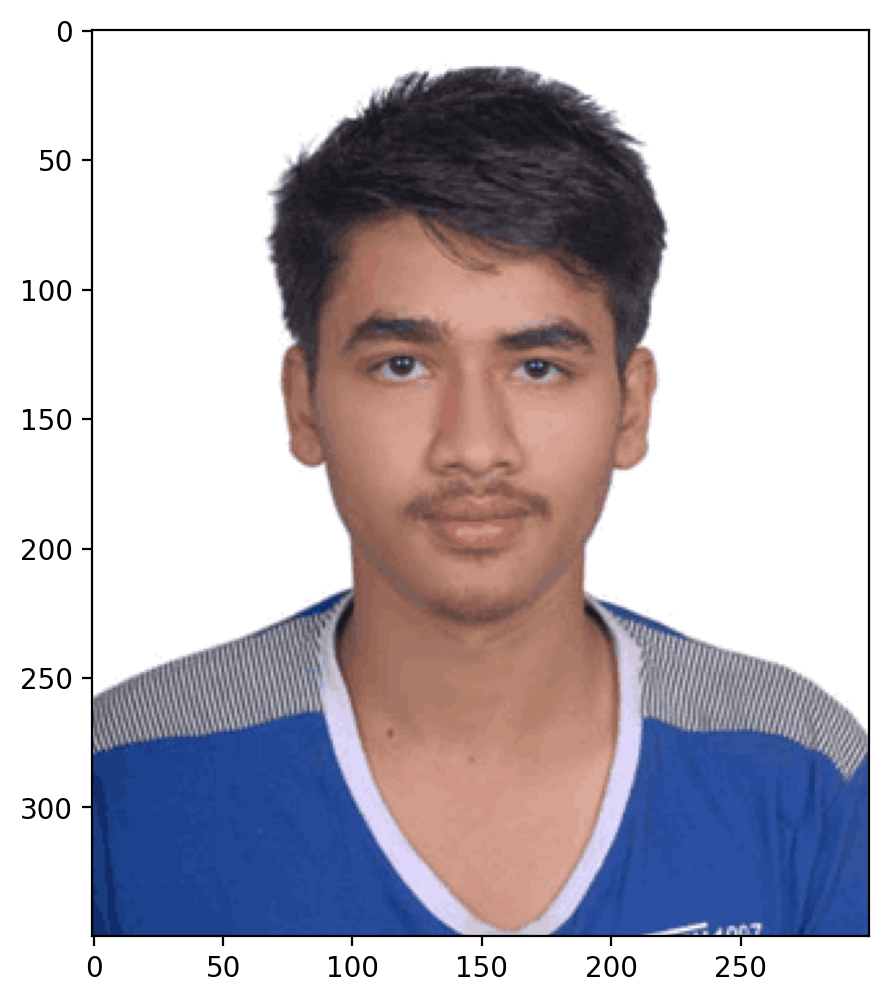

In [59]:
plt.figure(figsize=(6,6),dpi=200)
plt.imshow(quantized_image)